# **Email Spam Classifier using Support Vector Machines**

## **Author Details**

**R Anirudh**     (1MS17IS084)

**Rohit P N**     (1MS17IS094)

**Snehil Tiwari** (1MS17IS153)

**Institute: Ramaiah Institite of Technology, Bangalore**

**Date of submission: May 16, 2020**

## **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

seed=0

## **Data Preparation**

In [2]:
data = pd.read_csv('./data/spambase.data', header=None)
data = data.rename({57: "label"}, axis=1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


So, we have 57 columns in our data and 1 column for the labels. What these 57 columns represent can be seen in the ./data/spambase.names file

In [4]:
data.shape

(4601, 58)

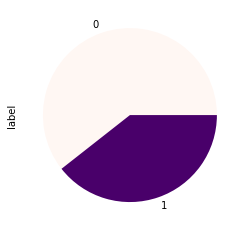

In [5]:
data['label'].value_counts().plot(kind='pie', cmap='RdPu')
plt.show()

**There's some imbalance in the data**

**So let's try to classify first, with the imbalance present, we'll later make it balanced and try the classifiers again**

## **Report Function**

In [6]:
def report(y_true, y_pred, C,  title):
    
    target_labels = ['class_0', 'class_1']
    
    classificationReport = classification_report(y_true, y_pred, target_names=target_labels)
    confusionMatrix = confusion_matrix(y_true, y_pred)
    oa = accuracy_score(y_true, y_pred)
    
    print('\n-----------------------', title, '-----------------------')
        
    print('\n\n------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------')
    print(C)
    
    print('\n\n------------------------ TEST ACCURACY -------------------------')
    print(oa)
    
    print("\n\n---------------------- CLASSIFICATION REPORT ----------------------")
    print(classificationReport)
    
    print("\n\n------------------------ CONFUSION MATRIX -------------------------")
    print(confusionMatrix)
    sns.heatmap(confusionMatrix, annot=True, cmap="RdPu", xticklabels=['Not Spam (Actual)', 'Spam (Actual)'], 
                yticklabels=['Not Spam (Predicted)', 'Spam (Predicted)'])

## **Imbalanced Classification**

In [7]:
X = data.drop('label', axis=1)
y = data['label']

In [8]:
X.shape, y.shape

((4601, 57), (4601,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3220, 57), (1381, 57), (3220,), (1381,))

### **RBF Kernel**

In [11]:
C_list = []
accuracies = []
for C in np.arange(1, 200000, 20000):
    
    classifier = SVC(C=C, kernel='rbf', random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

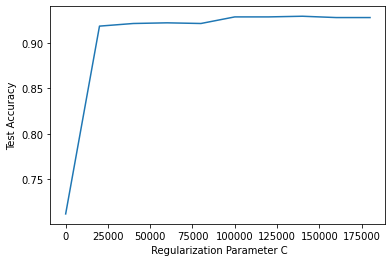

In [12]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [13]:
C = C_list[np.argmax(accuracies)]

In [14]:
classifier = SVC(C=C, kernel='rbf', random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=140001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
y_pred = classifier.predict(X_test)


----------------------- RBF KERNEL WITH DATA IMBALANCE -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
140001


------------------------ TEST ACCURACY -------------------------
0.9290369297610427


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       0.93      0.96      0.94       822
     class_1       0.93      0.89      0.91       559

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



------------------------ CONFUSION MATRIX -------------------------
[[787  35]
 [ 63 496]]


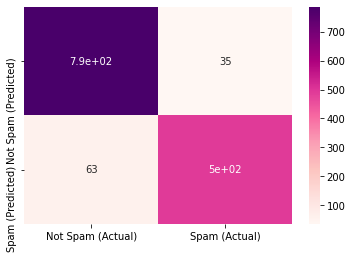

In [16]:
report(y_test, y_pred, C, title='RBF KERNEL WITH DATA IMBALANCE')

**We have the highest accuracy at C = 140000.**

**Intuition: After applying the RBF kernel, our data becomes decently seperable.**

### **Linear Kernel**

In [17]:
C_list = []
accuracies = []
for C in np.arange(1, 100, 10):
    
    classifier = SVC(C=C, kernel='linear', max_iter=10000, random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

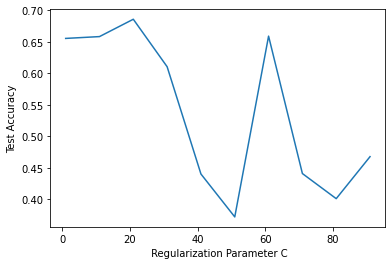

In [18]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [19]:
C = C_list[np.argmax(accuracies)]

In [20]:
classifier = SVC(C=C, kernel='linear', max_iter=10000, random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=21, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=10000, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = classifier.predict(X_test)


----------------------- LINEAR KERNEL WITH DATA IMBALANCE -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
21


------------------------ TEST ACCURACY -------------------------
0.6857349746560464


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       0.66      0.95      0.78       822
     class_1       0.81      0.29      0.43       559

    accuracy                           0.69      1381
   macro avg       0.74      0.62      0.61      1381
weighted avg       0.72      0.69      0.64      1381



------------------------ CONFUSION MATRIX -------------------------
[[784  38]
 [396 163]]


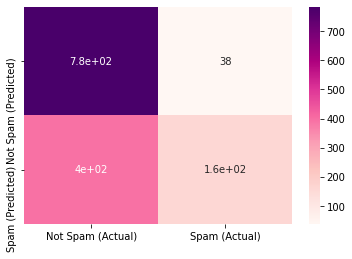

In [22]:
report(y_test, y_pred, C, title='LINEAR KERNEL WITH DATA IMBALANCE')

**Here C = 20, which is a lot smaller than our RBF kernel**

**Intuition: Since the accuracy is also significantly lower, a linear kernel is not able to transform our data to make it linearly seperable.**

### **Quadratic Kernel**

In [23]:
C_list = []
accuracies = []
for C in np.arange(1, 10000, 1000):
    
    classifier = SVC(C=C, kernel='poly', degree=2, max_iter=100000, random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

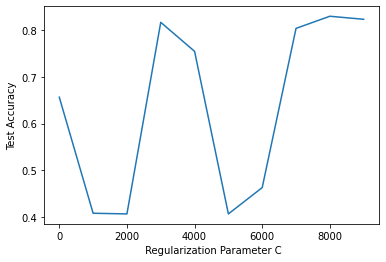

In [24]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [25]:
C = C_list[np.argmax(accuracies)]

In [26]:
classifier = SVC(C=C, kernel='poly', degree=2, max_iter=100000, random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=8001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=100000, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_pred = classifier.predict(X_test)


----------------------- QUADRATIC KERNEL WITH DATA IMBALANCE -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
8001


------------------------ TEST ACCURACY -------------------------
0.8305575669804489


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       0.80      0.95      0.87       822
     class_1       0.89      0.66      0.76       559

    accuracy                           0.83      1381
   macro avg       0.85      0.80      0.81      1381
weighted avg       0.84      0.83      0.82      1381



------------------------ CONFUSION MATRIX -------------------------
[[778  44]
 [190 369]]


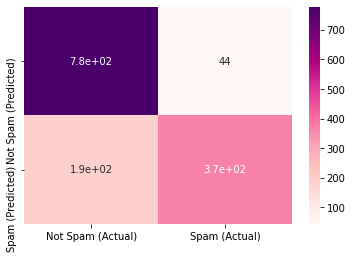

In [28]:
report(y_test, y_pred, C, title='QUADRATIC KERNEL WITH DATA IMBALANCE')

**Intuition: A quadratic kernel is doing well compared to linear kernel but not as well as RBF. This shows our original data was highly non-linear**

## **Balanced Data**

In [29]:
data_1 = data[data['label'] == 1]

In [30]:
data_0 = data[data['label'] == 0].sample(n=len(data_1))

In [31]:
data = pd.concat([data_0, data_1]).reset_index()

**We just drop some rows of the major class to make the data balanced**

**Instead of this approach, we can even pass the class_weight parameter to the SVM function, and let it internally handle the data imbalance**

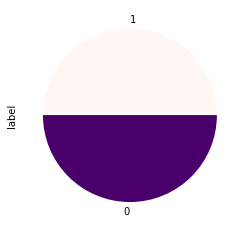

In [32]:
data['label'].value_counts().plot(kind='pie', cmap='RdPu')
plt.show()

In [33]:
X = data.drop('label', axis=1)
y = data['label']

In [34]:
X.shape, y.shape

((3626, 58), (3626,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2538, 58), (1088, 58), (2538,), (1088,))

### **RBF Kernel**

In [37]:
C_list = []
accuracies = []
for C in np.arange(1, 200000, 20000):
    
    classifier = SVC(C=C, kernel='rbf', random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

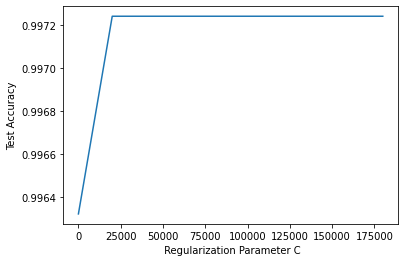

In [38]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [39]:
C = C_list[np.argmax(accuracies)]

In [40]:
classifier = SVC(C=C, kernel='rbf', random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=20001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
y_pred = classifier.predict(X_test)


----------------------- RBF KERNEL WITH BALANCED DATA -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
20001


------------------------ TEST ACCURACY -------------------------
0.9972426470588235


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       560
     class_1       1.00      1.00      1.00       528

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



------------------------ CONFUSION MATRIX -------------------------
[[558   2]
 [  1 527]]


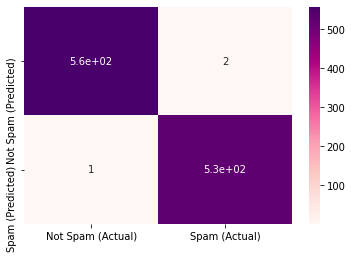

In [42]:
report(y_test, y_pred, C, title='RBF KERNEL WITH BALANCED DATA')

**SVMs work a lot better with balanced data.**

### **Linear Kernel**

In [43]:
C_list = []
accuracies = []
for C in np.arange(1, 10, 1):
    
    classifier = SVC(C=C, kernel='linear', random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

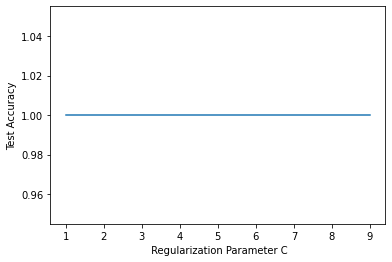

In [44]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [45]:
C = C_list[np.argmax(accuracies)]

**C isn't really making a difference here**

In [46]:
classifier = SVC(C=C, kernel='linear', random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
y_pred = classifier.predict(X_test)


----------------------- LINEAR KERNEL WITH BALANCED DATA -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
1


------------------------ TEST ACCURACY -------------------------
1.0


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       560
     class_1       1.00      1.00      1.00       528

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



------------------------ CONFUSION MATRIX -------------------------
[[560   0]
 [  0 528]]


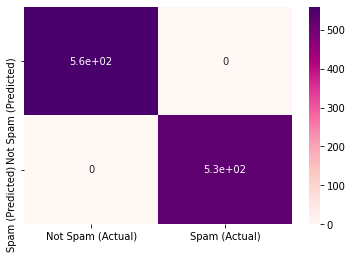

In [48]:
report(y_test, y_pred, C, title='LINEAR KERNEL WITH BALANCED DATA')

**So it wasn't the kernel but our imbalanced data that was hurting our accuracy**

### **Quadratic Kernel**

In [49]:
C_list = []
accuracies = []
for C in np.arange(1, 200000, 20000):
    
    classifier = SVC(C=C, kernel='poly', degree=2, random_state=seed)
    classifier.fit(X_train, y_train)
    acc = classifier.score(X_test, y_test)
    
    C_list.append(C)
    accuracies.append(acc)

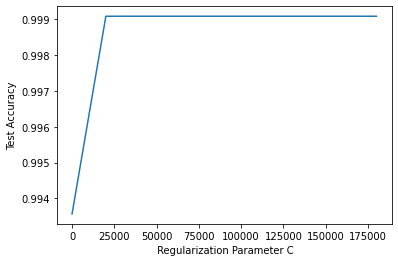

In [50]:
plt.plot(C_list, accuracies)
plt.xlabel(' Regularization Parameter C')
plt.ylabel('Test Accuracy')
plt.show()

In [51]:
C = C_list[np.argmax(accuracies)]

In [52]:
classifier = SVC(C=C, kernel='poly', degree=2, random_state=seed)
classifier.fit(X_train, y_train)

SVC(C=20001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [53]:
y_pred = classifier.predict(X_test)


----------------------- QUADRATIC KERNEL WITH BALANCED DATA -----------------------


------------------------ OPTIMUM C VALUE (REGULARIZATION TERM) -------------------------
20001


------------------------ TEST ACCURACY -------------------------
0.9990808823529411


---------------------- CLASSIFICATION REPORT ----------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       560
     class_1       1.00      1.00      1.00       528

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



------------------------ CONFUSION MATRIX -------------------------
[[560   0]
 [  1 527]]


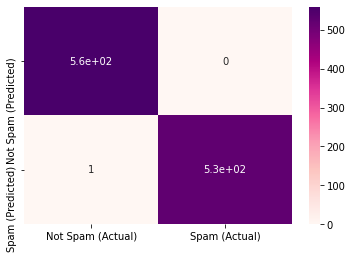

In [54]:
report(y_test, y_pred, C, title='QUADRATIC KERNEL WITH BALANCED DATA')

**Conclusion: Our data was apparently linearly seperable, but the data imbalance was hurting our classifier, once the data was balanced, even a linear kernel achieved 100% accuracy**